In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv("/content/sample_data/oneplusTV_extraction_reviews.csv")

In [37]:
df

,Unnamed: 0,product,title,rating,body
0,0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...
1,1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...
2,2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...
3,3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...
4,4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...
...,...,...,...,...,...
5785,5785,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Excellent
5786,5786,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Worth every penny,5.0,All good
5787,5787,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Very good
5788,5788,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Quality,4.0,Only the besals are not good


In [38]:
df = df.iloc[:,1:]

In [39]:
df

,product,title,rating,body
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...
...,...,...,...,...
5785,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Excellent
5786,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Worth every penny,5.0,All good
5787,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Awesome,5.0,Very good
5788,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Quality,4.0,Only the besals are not good


# text cleaning

In [40]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
df['body']= df['body'].astype(str)

In [42]:
print(df.shape)
print(df.isnull().sum())

(5790, 4)
product    0
title      1
rating     0
body       0
dtype: int64


In [43]:
# Lower case all words
df['review_lower'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,product,title,rating,body,review_lower
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...


In [44]:
# Remove Punctuation
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,product,title,rating,body,review_lower,review_nopunc
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...


In [45]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove Stopwords
df['review_nopunc_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...


In [47]:
import textblob
from textblob import Word

In [48]:
# Lemmatize final review format
df['cleaned_review'] = df['review_nopunc_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...


In [49]:
df.to_csv("cleaned_review_byT")

In [9]:
#df['Name'] = df['Name'].str.replace('\d+', '')
#remove numbersin review
#df['remove_num'] = df['tokenized'].apply(lambda x: [word.replace('\d+', '') for word in x])
#df.head()

In [50]:
#!pip install contractions

In [51]:
#import contractions
#“I’ve” = “I have” 
#https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28
#df['no_contract'] = df['body'].apply(lambda x: [contractions.fix(word) for word in x.split()])
#df.head()

In [52]:
# word tokenization
#df['tokenized'] = df['body'].apply(word_tokenize)
#df.head()

In [53]:
# Convert to lowercase
#df['lower_case'] = df['no_contract'].apply(lambda x: [word.lower() for word in x])
#df.head()

In [54]:
#import string
# Removing Punctuations
#punc = string.punctuation
#f['punctuation'] = df['lower_case'].apply(lambda x: [word for word in x if word not in punc])
#df.head()

In [55]:
#from nltk.corpus import stopwords
# Removing Stopwords
#stop_words = set(stopwords.words('english'))
#df['remove_stopwords'] = df['punctuation'].apply(lambda x: [word for word in x if word not in stop_words])
#df.head()

In [56]:
#from nltk.stem import WordNetLemmatizer
# Lemitization
#wnl = WordNetLemmatizer()
#df['lemitized'] = df['remove_stopwords'].apply(lambda x: [wnl.lemmatize(word) for word in x])
#df.head()

In [57]:
#df.iloc[4]['lemitized']

#Sentiment Analysis

In [59]:
# Calculate polarity
from textblob import TextBlob

In [60]:
df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment)

0       (-0.04115884115884113, 0.28827838827838825)
1          (0.1314393939393939, 0.4159090909090909)
2        (0.04771825396825395, 0.35724206349206344)
3         (0.40925925925925927, 0.5907407407407407)
4          (0.3961309523809524, 0.4071428571428572)
                           ...                     
5785                                     (1.0, 1.0)
5786                      (0.7, 0.6000000000000001)
5787                      (0.7, 0.6000000000000001)
5788                      (0.7, 0.6000000000000001)
5789                                    (0.0, 0.15)
Name: cleaned_review, Length: 5790, dtype: object

In [61]:
df['polarity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review,polarity
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...,-0.041159
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...,0.131439
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...,0.047718
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...,0.409259
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...,0.396131


In [62]:
# Calculate subjectivity
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review,polarity,subjectivity
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...,-0.041159,0.288278
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...,0.131439,0.415909
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...,0.047718,0.357242
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...,0.409259,0.590741
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...,0.396131,0.407143


In [63]:
df.to_csv("cleaned_review_byT_2")

In [64]:
df["sentiment_by_polarity"] = np.where(df["polarity"]>=0, "1", "0")
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review,polarity,subjectivity,sentiment_by_polarity
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...,-0.041159,0.288278,0
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...,0.131439,0.415909,1
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...,0.047718,0.357242,1
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...,0.409259,0.590741,1
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...,0.396131,0.407143,1


In [65]:
df["sentiment_by_rating"] = np.where(df["rating"]>=3, "1", "0")
df.head()

,product,title,rating,body,review_lower,review_nopunc,review_nopunc_nostop,cleaned_review,polarity,subjectivity,sentiment_by_polarity,sentiment_by_rating
0,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Replacement received from Amazon and it's work...,4.0,The media could not be loaded.\n ...,the media could not be loaded. never expected ...,the media could not be loaded never expected t...,media could loaded never expected write negati...,medium could loaded never expected write negat...,-0.041159,0.288278,0,1
1,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Cinematic picture quality with low quality sou...,4.0,TV is beautiful with minute bezels.I was pleas...,tv is beautiful with minute bezels.i was pleas...,tv is beautiful with minute bezelsi was please...,tv beautiful minute bezelsi pleased picture qu...,tv beautiful minute bezelsi pleased picture qu...,0.131439,0.415909,1,1
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Y DIS Y series?,1.0,ere is my experience with the Oneplus LAGGY tv...,ere is my experience with the oneplus laggy tv...,ere is my experience with the oneplus laggy tv...,ere experience oneplus laggy tv32y model list ...,ere experience oneplus laggy tv32y model list ...,0.047718,0.357242,1,0
3,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"Contrast Ratio, Viewing Angle, Colours, All Good.",5.0,I will be brief here.Unboxing:No wall Mount.No...,i will be brief here.unboxing:no wall mount.no...,i will be brief hereunboxingno wall mountno di...,brief hereunboxingno wall mountno display cabl...,brief hereunboxingno wall mountno display cabl...,0.409259,0.590741,1,1
4,OnePlus 108 cm (43 inches) Y Series Full HD LE...,Best Budget TV,5.0,After 10 days usage :1. Display is good not be...,after 10 days usage :1. display is good not be...,after 10 days usage 1 display is good not best...,10 days usage 1 display good best2 sound could...,10 day usage 1 display good best2 sound could ...,0.396131,0.407143,1,1


In [66]:
df.to_csv("cleaned_review_byT_3")

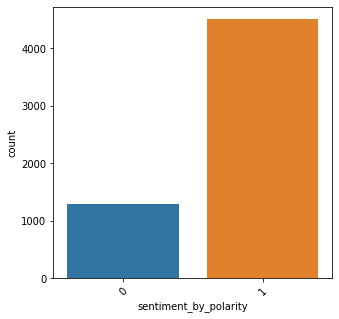

In [67]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.countplot(x="sentiment_by_polarity", data=df)

In [69]:
df['sentiment_by_polarity'].value_counts()

1    4499
0    1291
Name: sentiment_by_polarity, dtype: int64

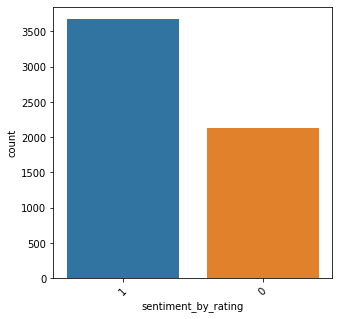

In [68]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.countplot(x="sentiment_by_rating", data=df)

In [70]:
df['sentiment_by_rating'].value_counts()

1    3667
0    2123
Name: sentiment_by_rating, dtype: int64

In [ ]:
df = pd.read_csv("/content/sample_data/sentiment_oneplus_reviews_3.csv")

In [71]:
df['sentiment_by_rating'].value_counts()

1    3667
0    2123
Name: sentiment_by_rating, dtype: int64

In [72]:
X = df['cleaned_review']

In [73]:
y= df['sentiment_by_rating']

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

In [75]:
X = cv.fit_transform(X.values.astype('U'))

In [76]:
print(X)

  (0, 3054)	0.09117585936580017
  (0, 6605)	0.1253777091751731
  (0, 3644)	0.05429697729771478
  (0, 6423)	0.04162024937858996
  (0, 1191)	0.07454311810391667
  (0, 7501)	0.0717249296226468
  (0, 3566)	0.08343332393591704
  (0, 2815)	0.07502582136081722
  (0, 7696)	0.053539053992950995
  (0, 400)	0.13332918643563804
  (0, 4672)	0.13332918643563804
  (0, 5827)	0.07182439278956229
  (0, 1017)	0.058130526033766845
  (0, 3599)	0.1253777091751731
  (0, 1954)	0.06164541743341954
  (0, 513)	0.13332918643563804
  (0, 1297)	0.06328545212515585
  (0, 2146)	0.10096073942776454
  (0, 964)	0.11175022176372237
  (0, 6241)	0.12885114666840883
  (0, 4965)	0.11806166433245101
  (0, 7815)	0.171386434649155
  (0, 5767)	0.12014020499801971
  (0, 6780)	0.07152788986935683
  (0, 5753)	0.2229217983818726
  :	:
  (5777, 5251)	0.5604448603940264
  (5778, 7216)	0.6806232231323479
  (5778, 2746)	0.640032260070455
  (5778, 3138)	0.32276790266053085
  (5778, 7084)	0.15143188308332486
  (5779, 2728)	0.8296956493397

In [77]:
print(X.shape,y.shape)

(5790, 8007) (5790,)


In [78]:
#target variable is not balance then use smote oversampling method

print("Before OverSampling, counts of label 'positive': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label 'negative': {} \n".format(sum(y == 0)))

from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_scaled, y_scaled = smote.fit_resample(X, y.ravel())

print('After OverSampling, the shape of X: {}'.format(X_scaled.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_scaled.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_scaled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_scaled == 0)))


Before OverSampling, counts of label 'positive': 0
Before OverSampling, counts of label 'negative': 0 

After OverSampling, the shape of X: (7334, 8007)
After OverSampling, the shape of y: (7334,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


Look! that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.
Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

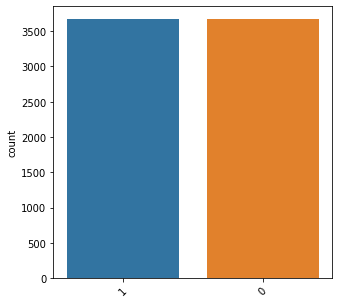

In [79]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.countplot(x=y_scaled, data=df)

In [80]:
pip install sklearn

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [84]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = logi.predict(X_test)

In [86]:
ytest_pred = logi.predict(X_test)
ytrain_pred = logi.predict(X_train)
test_acc = accuracy_score(ytest_pred, y_test)
train_acc = accuracy_score(ytrain_pred, y_train)
print(train_acc)
print(test_acc)

0.9153713298791019
0.8537708693149108


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       637
           1       0.86      0.92      0.89      1100

    accuracy                           0.85      1737
   macro avg       0.85      0.83      0.84      1737
weighted avg       0.85      0.85      0.85      1737



## The accuracy comes out to be 96% but did you notice something 

---

strange ? 
The recall of the minority class in very less(64 percent). It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

In [88]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_scaled, test_size = 0.30, random_state = 0)

In [89]:
logi_scaled = LogisticRegression()
logi_scaled.fit(X_train_scaled, y_train_scaled)
predictions = logi_scaled.predict(X_test_scaled)
  
# print classification report
print(classification_report(y_test_scaled, predictions))

# accuracy score
ytest_pred = logi_scaled.predict(X_test_scaled)
ytrain_pred = logi_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1115
           1       0.90      0.83      0.86      1086

    accuracy                           0.87      2201
   macro avg       0.87      0.87      0.87      2201
weighted avg       0.87      0.87      0.87      2201

test Accuracy : 0.8686960472512494
train accuracy: 0.9236314046366647


Wow, minority class has improved to 98 %. This is a good model compared to the previous one. Recall is great.

## Bernauli Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB

In [91]:
bnb = BernoulliNB()

In [92]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [93]:
y_pred = bnb.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred))
# accuracy score
ytest_pred = bnb.predict(X_test)
ytrain_pred = bnb.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       637
           1       0.78      0.92      0.85      1100

    accuracy                           0.79      1737
   macro avg       0.79      0.74      0.75      1737
weighted avg       0.79      0.79      0.78      1737

test Accuracy : 0.788140472078296
train accuracy: 0.8238341968911918


In [95]:
bnb_scaled = BernoulliNB()
bnb_scaled.fit(X_train_scaled, y_train_scaled)
predictions = bnb_scaled.predict(X_test_scaled)
  
# print classification report
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = bnb_scaled.predict(X_test_scaled)
ytrain_pred = bnb_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1115
           1       0.71      0.92      0.80      1086

    accuracy                           0.77      2201
   macro avg       0.80      0.78      0.77      2201
weighted avg       0.80      0.77      0.77      2201

test Accuracy : 0.7737392094502499
train accuracy: 0.8065458796025716


# Naive Bayes classifier for multinomial models

In [96]:
from sklearn.naive_bayes import MultinomialNB

In [97]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = mnb.predict(X_test)
ytrain_pred = mnb.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       637
           1       0.82      0.95      0.88      1100

    accuracy                           0.83      1737
   macro avg       0.85      0.79      0.81      1737
weighted avg       0.84      0.83      0.83      1737

test Accuracy : 0.8336211859527922
train accuracy: 0.8874907475943745


In [98]:
mnb_scaled = MultinomialNB()
mnb_scaled.fit(X_train_scaled, y_train_scaled)
predictions = mnb_scaled.predict(X_test_scaled)

# print classification report
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = mnb_scaled.predict(X_test_scaled)
ytrain_pred = mnb_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1115
           1       0.89      0.82      0.85      1086

    accuracy                           0.86      2201
   macro avg       0.86      0.86      0.86      2201
weighted avg       0.86      0.86      0.86      2201

test Accuracy : 0.8614266242616992
train accuracy: 0.9086304305474382


# k-nearest neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predictions = bnb.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = neigh.predict(X_test)
ytrain_pred = neigh.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       637
           1       0.78      0.92      0.85      1100

    accuracy                           0.79      1737
   macro avg       0.79      0.74      0.75      1737
weighted avg       0.79      0.79      0.78      1737

test Accuracy : 0.6574553828439839
train accuracy: 0.8122378485072785


In [101]:
neigh_scaled = KNeighborsClassifier(n_neighbors=3)
neigh_scaled.fit(X_train_scaled, y_train_scaled)
predictions = bnb_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = neigh_scaled.predict(X_test_scaled)
ytrain_pred = neigh_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1115
           1       0.71      0.92      0.80      1086

    accuracy                           0.77      2201
   macro avg       0.80      0.78      0.77      2201
weighted avg       0.80      0.77      0.77      2201

test Accuracy : 0.6665152203543844
train accuracy: 0.824274303526203


## Support Vector Machine

In [102]:
from sklearn import svm

In [103]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = svm_model.predict(X_test)
ytrain_pred = svm_model.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       637
           1       0.90      0.94      0.92      1100

    accuracy                           0.89      1737
   macro avg       0.89      0.87      0.88      1737
weighted avg       0.89      0.89      0.89      1737

test Accuracy : 0.8917674150834772
train accuracy: 0.9834690352825067


In [104]:
svm_model_scaled = svm.SVC()
svm_model_scaled.fit(X_train_scaled, y_train_scaled)
predictions = svm_model_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = svm_model_scaled.predict(X_test_scaled)
ytrain_pred = svm_model_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1115
           1       0.92      0.91      0.92      1086

    accuracy                           0.92      2201
   macro avg       0.92      0.92      0.92      2201
weighted avg       0.92      0.92      0.92      2201

test Accuracy : 0.9177646524307133
train accuracy: 0.9840249366842003


# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
d_classi = DecisionTreeClassifier(random_state=2)
d_classi.fit(X_train, y_train)
predictions = d_classi.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = d_classi.predict(X_test)
ytrain_pred = d_classi.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       637
           1       0.88      0.90      0.89      1100

    accuracy                           0.86      1737
   macro avg       0.85      0.84      0.85      1737
weighted avg       0.86      0.86      0.86      1737

test Accuracy : 0.8578008059873344
train accuracy: 0.994325191216383


In [107]:
d_classi_scaled = DecisionTreeClassifier(random_state=2)
d_classi_scaled.fit(X_train_scaled, y_train_scaled)
predictions = d_classi_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = d_classi_scaled.predict(X_test_scaled)
ytrain_pred = d_classi_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1115
           1       0.88      0.87      0.87      1086

    accuracy                           0.88      2201
   macro avg       0.88      0.88      0.88      2201
weighted avg       0.88      0.88      0.88      2201

test Accuracy : 0.8759654702407996
train accuracy: 0.9933761932593026


## Extra Tree Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [109]:
et_classi = ExtraTreesClassifier(random_state=2)
et_classi.fit(X_train, y_train)
predictions = et_classi.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = et_classi.predict(X_test)
ytrain_pred = et_classi.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       637
           1       0.89      0.94      0.91      1100

    accuracy                           0.89      1737
   macro avg       0.89      0.87      0.88      1737
weighted avg       0.89      0.89      0.89      1737

test Accuracy : 0.8877374784110535
train accuracy: 0.994325191216383


In [110]:
et_classi_scaled = ExtraTreesClassifier(random_state=2)
et_classi_scaled.fit(X_train_scaled, y_train_scaled)
predictions = et_classi_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = et_classi_scaled.predict(X_test_scaled)
ytrain_pred = et_classi_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1115
           1       0.93      0.87      0.90      1086

    accuracy                           0.90      2201
   macro avg       0.91      0.90      0.90      2201
weighted avg       0.91      0.90      0.90      2201

test Accuracy : 0.9045888232621536
train accuracy: 0.9933761932593026


# Random Forest Classifier

In [111]:
rfc = RandomForestClassifier(random_state=2)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = rfc.predict(X_test)
ytrain_pred = rfc.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       637
           1       0.89      0.94      0.92      1100

    accuracy                           0.89      1737
   macro avg       0.89      0.87      0.88      1737
weighted avg       0.89      0.89      0.89      1737

test Accuracy : 0.8917674150834772
train accuracy: 0.994325191216383


In [112]:
rfc_scaled = RandomForestClassifier(random_state=2)
rfc_scaled.fit(X_train_scaled, y_train_scaled)
predictions = rfc_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = rfc_scaled.predict(X_test_scaled)
ytrain_pred = rfc_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1115
           1       0.93      0.88      0.90      1086

    accuracy                           0.91      2201
   macro avg       0.91      0.91      0.91      2201
weighted avg       0.91      0.91      0.91      2201

test Accuracy : 0.9077691958200818
train accuracy: 0.9933761932593026


## XG Boost Classifier

In [113]:
#!pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [114]:
xgboost_classi = XGBClassifier(eval_metric='mlogloss',random_state=2)
xgboost_classi.fit(X_train, y_train)
predictions = xgboost_classi.predict(X_test)
print(classification_report(y_test, predictions))
# accuracy score
ytest_pred = xgboost_classi.predict(X_test)
ytrain_pred = xgboost_classi.predict(X_train)
print("test Accuracy :", accuracy_score(ytest_pred, y_test))
print("train accuracy:", accuracy_score(ytrain_pred, y_train))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       637
           1       0.83      0.91      0.87      1100

    accuracy                           0.82      1737
   macro avg       0.82      0.79      0.80      1737
weighted avg       0.82      0.82      0.82      1737

test Accuracy : 0.823258491652274
train accuracy: 0.8559092030594622


In [115]:
xgboost_classi_scaled = XGBClassifier(eval_metric='mlogloss',random_state=2)
xgboost_classi_scaled.fit(X_train_scaled, y_train_scaled)
predictions = xgboost_classi_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))
# accuracy score
ytest_pred = xgboost_classi_scaled.predict(X_test_scaled)
ytrain_pred = xgboost_classi_scaled.predict(X_train_scaled)
print("test Accuracy :", accuracy_score(ytest_pred, y_test_scaled))
print("train accuracy:", accuracy_score(ytrain_pred, y_train_scaled))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1115
           1       0.83      0.83      0.83      1086

    accuracy                           0.83      2201
   macro avg       0.83      0.83      0.83      2201
weighted avg       0.83      0.83      0.83      2201

test Accuracy : 0.8318945933666515
train accuracy: 0.8671342294954217


In [124]:
import pickle
pickle.dump(cv,open('tfidf.pkl','wb'))
pickle.dump(xgboost_classi_scaled,open('model_xg_boost_with_smote.pkl','wb'))
pickle.dump(rfc_scaled,open('model_random_forest.pkl','wb'))

In [117]:
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import os
import time
from nltk.stem import WordNetLemmatizer

In [118]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [119]:
p = "I brought this TV at the begining of Feb 21, and the tv faced a display issue just after 1 and half months i.e on 15th april.The display went off, all though the sound was there.Contacted amazon and claimed for warranty and repair services.The technicians came in on 16th, and went away just by switching on the tv and looking at the black screen, saying that the TV will get replaced by the company."
lemmatizer = WordNetLemmatizer()
sentences = nltk.sent_tokenize(p)
# Lemmatization

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words)  
    
print(words)

['I', 'brought', 'TV', 'begining', 'Feb', '21', ',', 'tv', 'faced', 'display', 'issue', '1', 'half', 'month', 'i.e', '15th', 'april.The', 'display', 'went', ',', 'though', 'sound', 'there.Contacted', 'amazon', 'claimed', 'warranty', 'repair', 'services.The', 'technician', 'came', '16th', ',', 'went', 'away', 'switching', 'tv', 'looking', 'black', 'screen', ',', 'saying', 'TV', 'get', 'replaced', 'company', '.']


In [120]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [135]:
p = cv.transform(["ere is my experience with the Oneplus LAGGY tv32Y model.Here is a list of issues with your product.1. connected to Samsung mobile through google home as the tv isn't connecting through Samsung smart view. always says unable to connect, try again. And even through the google home, it is struggling too much to even cast the photos and forget about casting the videos.2. Neither windows nor Mac is recognising The tv in wireless mode"])
predictions_xg_boost = xgboost_classi_scaled.predict(p)
predictions_random_forest = rfc.predict(p)
print(predictions_xg_boost,predictions_random_forest)

['0'] ['0']


In [137]:
p = cv.transform(["1. Picture quality is good. Look & Feel is good. I would quote Best in this segment TVs.I have explored most of the well noted brands in this price segment.2. Sound is 3/5. With Dolby Digital Plus enabled, it is better.3. TV build quality is good, Viewing Angles are good too.4. 4K Videos will be reset to 1080p and this is the maximum resolution for any video.5. Only 4.6GB memory is available out of 8GB.6. Oxygen Play is useless.7. There is bloatware instead of oneplus clean software motto.8. Accessing Tv with Oneplus connect App is 1 out of 5. Its a disaster.9. Wall Mount is free. It will be brought by installation provider, do not shell extra bucks for wall mount or installation."])
predictions_xg_boost = xgboost_classi_scaled.predict(p)
predictions_random_forest = rfc.predict(p)
print(predictions_xg_boost,predictions_random_forest)

['1'] ['1']


['0'] ['0']
